# Customer Segmentation for Online Retailing - Feature Engineering and Machine Learing

In [1]:
#Load python packages
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

color = sns.color_palette()

In [2]:
df = pd.read_csv('G:/My Drive/Jun/Mechine Learning/Data Science/Capstone Two/CleanData.csv')
df.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Month,Year,Weekday,Month_year,Day_Month_Year,Hour,Spending
0,0,549222,16008,SMALL FOLDING SCISSOR(POINTED EDGE),24,2011-04-07 10:43:00,0.25,12347,Iceland,7,4,2011,Thursday,2011-04-01 00:00:00,2011-04-07 00:00:00,10,6.0
1,1,556201,17021,NAMASTE SWAGAT INCENSE,36,2011-06-09 13:01:00,0.30,12347,Iceland,9,6,2011,Thursday,2011-06-01 00:00:00,2011-06-09 00:00:00,13,10.8
2,2,549222,20665,RED RETROSPOT PURSE,6,2011-04-07 10:43:00,2.95,12347,Iceland,7,4,2011,Thursday,2011-04-01 00:00:00,2011-04-07 00:00:00,10,17.7
3,3,542237,20719,WOODLAND CHARLOTTE BAG,10,2011-01-26 14:30:00,0.85,12347,Iceland,26,1,2011,Wednesday,2011-01-01 00:00:00,2011-01-26 00:00:00,14,8.5
4,4,562032,20719,WOODLAND CHARLOTTE BAG,10,2011-08-02 08:48:00,0.85,12347,Iceland,2,8,2011,Tuesday,2011-08-01 00:00:00,2011-08-02 00:00:00,8,8.5


In [4]:
del df['Unnamed: 0']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388057 entries, 0 to 388056
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   InvoiceNo       388057 non-null  int64  
 1   StockCode       388057 non-null  object 
 2   Description     388057 non-null  object 
 3   Quantity        388057 non-null  int64  
 4   InvoiceDate     388057 non-null  object 
 5   UnitPrice       388057 non-null  float64
 6   CustomerID      388057 non-null  int64  
 7   Country         388057 non-null  object 
 8   Day             388057 non-null  int64  
 9   Month           388057 non-null  int64  
 10  Year            388057 non-null  int64  
 11  Weekday         388057 non-null  object 
 12  Month_year      388057 non-null  object 
 13  Day_Month_Year  388057 non-null  object 
 14  Hour            388057 non-null  int64  
 15  Spending        388057 non-null  float64
dtypes: float64(2), int64(7), object(7)
memory usage: 47.4+ M

In [11]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']).dt.date

In [7]:
df['CustomerID'] = df['CustomerID'].astype(str)

In [9]:
df['InvoiceNo'] = df['InvoiceNo'].astype(str)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388057 entries, 0 to 388056
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   InvoiceNo       388057 non-null  object 
 1   StockCode       388057 non-null  object 
 2   Description     388057 non-null  object 
 3   Quantity        388057 non-null  int64  
 4   InvoiceDate     388057 non-null  object 
 5   UnitPrice       388057 non-null  float64
 6   CustomerID      388057 non-null  object 
 7   Country         388057 non-null  object 
 8   Day             388057 non-null  int64  
 9   Month           388057 non-null  int64  
 10  Year            388057 non-null  int64  
 11  Weekday         388057 non-null  object 
 12  Month_year      388057 non-null  object 
 13  Day_Month_Year  388057 non-null  object 
 14  Hour            388057 non-null  int64  
 15  Spending        388057 non-null  float64
dtypes: float64(2), int64(5), object(9)
memory usage: 47.4+ M

In [13]:
print(df['InvoiceDate'].min())
print(df['InvoiceDate'].max())

2010-12-01
2011-12-09


In [14]:
presence = dt.date(2011, 12, 10)

## 4. Data pre-processing and Feature Engineering
##### This section prepares data for machine learning application. There are many ways of pre-processing. Here for this case, we will use original data and RFM for clustomer segment. 

### RFM

Calculate recency, frequency and monetary values:

Recency (R) as days since last purchase: How many days ago was their last purchase? Deduct most recent purchase date from today to calculate the recency value. 1 day ago? 14 days ago? 500 days ago?

Frequency (F) as total number of transactions: How many times has the customer purchased from our store? For example, if someone placed 10 orders over a period of time, their frequency is 10.

Monetary (M) as total money spent: How many $$ (or whatever is your currency of calculation) has this customer spent? Again limit to last two years – or take all time. Simply total up the money from all transactions to get the M value.

Source: https://www.putler.com/rfm-analysis/

In [15]:
rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (presence - x.max()).days, 'InvoiceNo': lambda x: len(x.unique()), 'Spending': lambda x: x.sum()})
rfm['InvoiceDate'] = rfm['InvoiceDate'].astype(int)
rfm.rename(columns={'InvoiceDate': 'recency', 
                         'InvoiceNo': 'frequency', 
                         'Spending': 'monetary_value'}, inplace=True)
rfm.head()


,recency,frequency,monetary_value
CustomerID,,,
12347,3,7,4310.00
12348,76,4,1437.24
12349,19,1,1457.55
12350,311,1,294.40
12352,37,6,1265.41


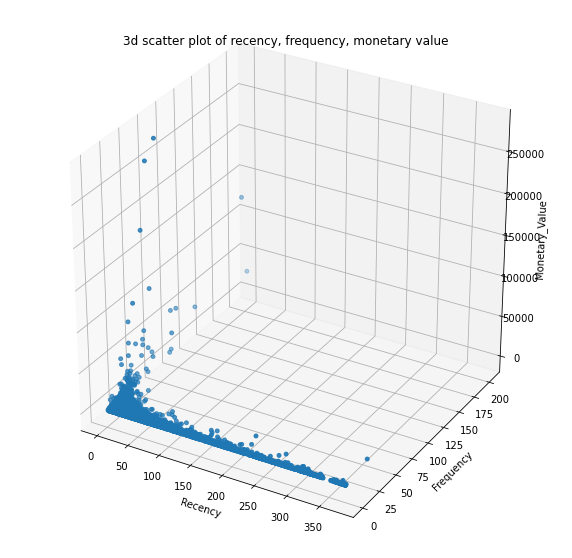

In [16]:
#3d scatter plot of recency, frequency, monetary value
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

xs = rfm.recency
ys = rfm.frequency
zs = rfm.monetary_value
ax.scatter(xs, ys, zs, s=15)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary_Value')
plt.title('3d scatter plot of recency, frequency, monetary value')
plt.show()

In [17]:
rfm.describe()

,recency,frequency,monetary_value
count,4324.000000,4324.000000,4324.000000
mean,93.350833,4.226642,1919.261025
std,100.258736,7.567506,8307.430912
min,1.000000,1.000000,2.900000
25%,18.000000,1.000000,300.752500
50%,51.000000,2.000000,656.430000
75%,144.000000,5.000000,1613.095000
max,374.000000,203.000000,278742.020000


In [ ]:
rfm[rfm['monetary_value']>5000].count()

In [ ]:
rfm[rfm['frequency']>40].count()

In [ ]:
rfm=rfm[rfm['monetary_value']<=5000]
rfm.describe()

In [ ]:
rfm=rfm[rfm['frequency']<=50]
rfm.describe()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D73086A760>,
      dtype=object)

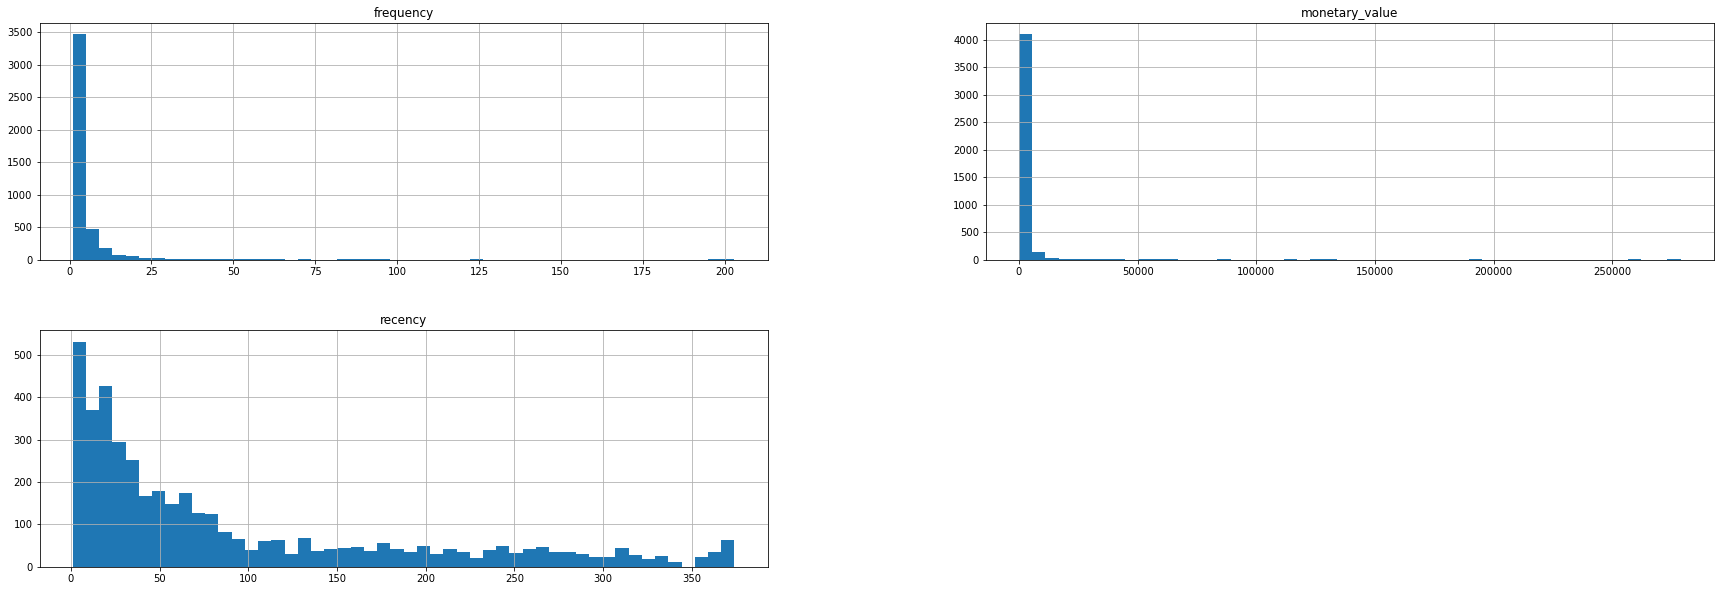

In [73]:
rfm.hist(bins=50, figsize=(30, 10))

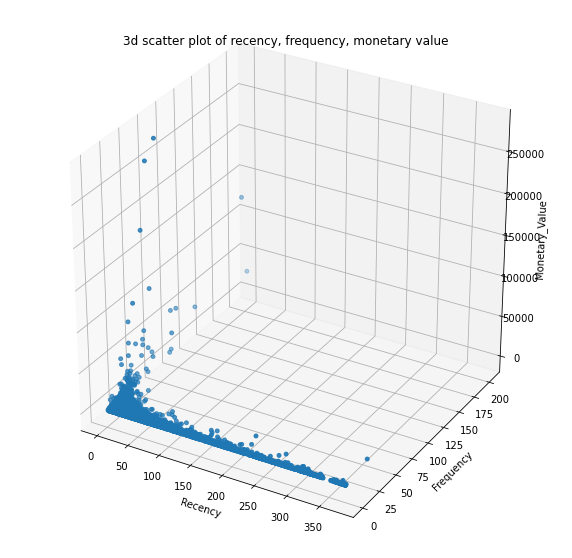

In [18]:
#3d scatter plot of recency, frequency, monetary value
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

xs = rfm.recency
ys = rfm.frequency
zs = rfm.monetary_value
ax.scatter(xs, ys, zs, s=15)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary_Value')
plt.title('3d scatter plot of recency, frequency, monetary value')
plt.show()

In [19]:
rfm.corr()

,recency,frequency,monetary_value
recency,1.000000,-0.262566,-0.130211
frequency,-0.262566,1.000000,0.575302
monetary_value,-0.130211,0.575302,1.000000


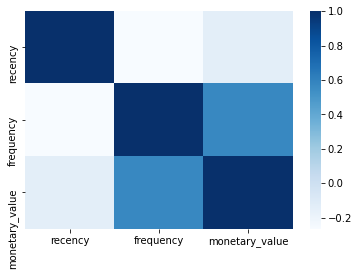

In [20]:
sns.heatmap(rfm.corr(), cmap="Blues")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D726272D90>,
      dtype=object)

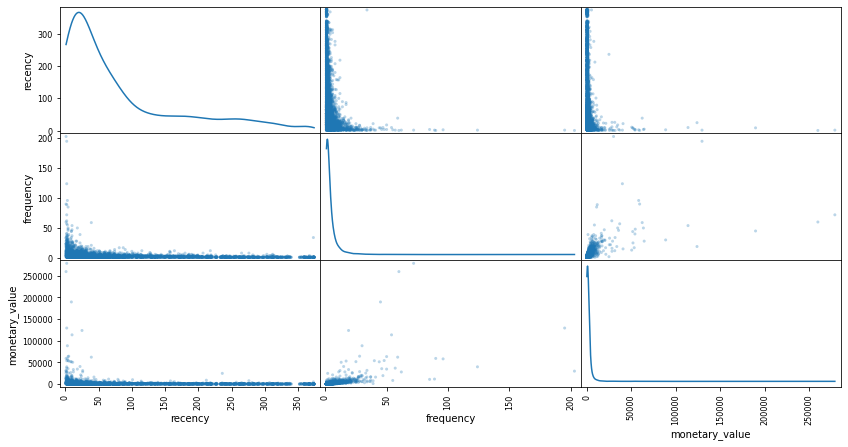

In [21]:
from pandas.plotting import scatter_matrix
# to get a better understanding of the dataset, we make a scatter matrix.
scatter_matrix(rfm, alpha=0.3, figsize=(14,7), diagonal='kde')

#### We can see all r, f, and m are highly skewed. We would prefer to take the log values before machine learning.

In [22]:
rfm_log = np.log(rfm)
rfm_log.describe()

,recency,frequency,monetary_value
count,4324.000000,4324.000000,4324.000000
mean,3.804122,0.936621,6.556687
std,1.383588,0.897661,1.254719
min,0.000000,0.000000,1.064711
25%,2.890372,0.000000,5.706288
50%,3.931826,0.693147,6.486816
75%,4.969813,1.609438,7.385910
max,5.924256,5.313206,12.538042


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D7327167C0>,
      dtype=object)

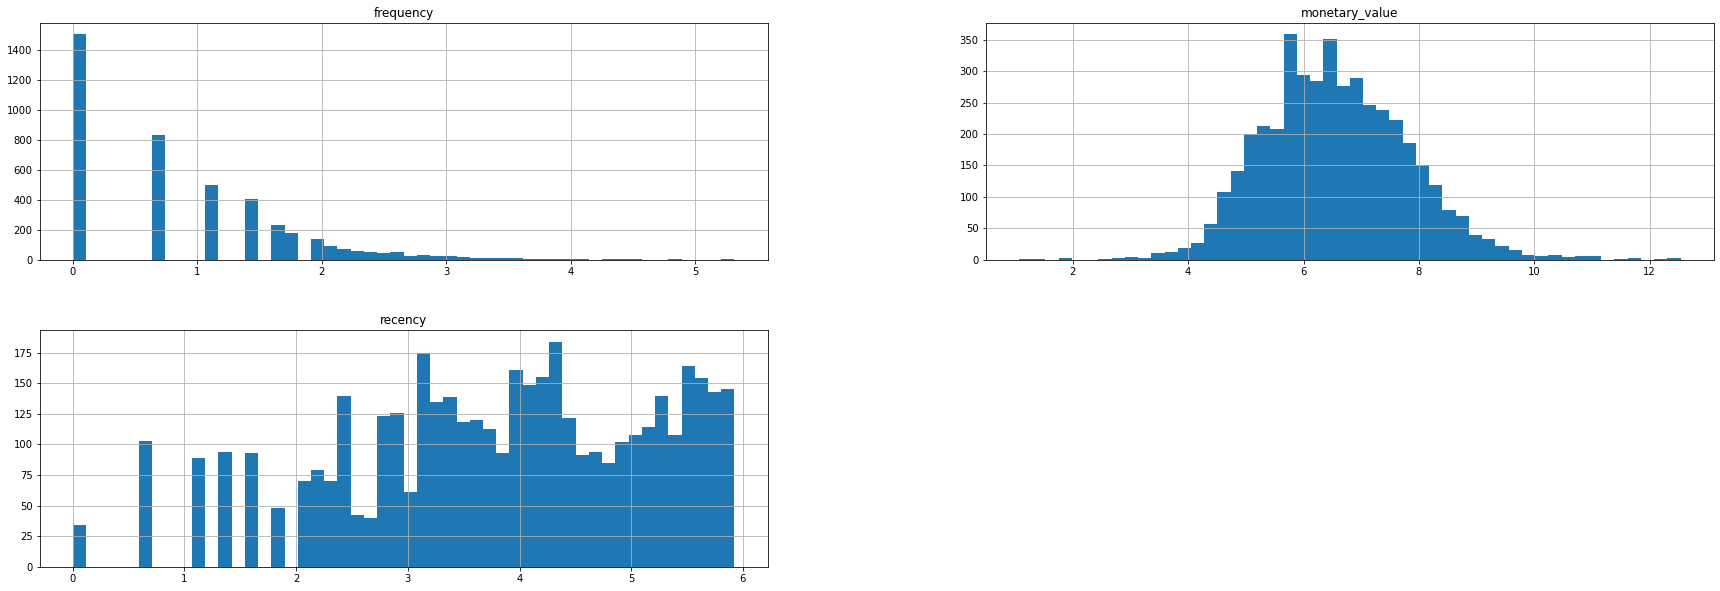

In [74]:
rfm_log.hist(bins=50, figsize=(30, 10))

In [75]:
rfm_log.corr()

,recency,frequency,monetary_value
recency,1.000000,-0.578141,-0.488928
frequency,-0.578141,1.000000,0.813766
monetary_value,-0.488928,0.813766,1.000000


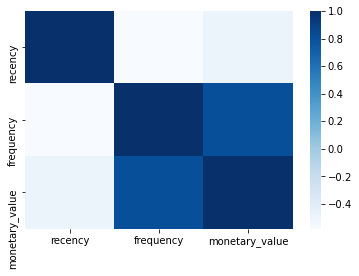

In [76]:
sns.heatmap(rfm_log.corr(), cmap="Blues")

#### Add quantiles

In [ ]:
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [ ]:
rfm_segments= rfm_log

In [ ]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [ ]:
rfm_segments['R_Quartile'] = rfm_segments['recency'].apply(RClass, args=('recency',quantiles,))
rfm_segments['F_Quartile'] = rfm_segments['frequency'].apply(FMClass, args=('frequency',quantiles,))
rfm_segments['M_Quartile'] = rfm_segments['monetary_value'].apply(FMClass, args=('monetary_value',quantiles,))

In [ ]:
# rfm_segments['RFMClass'] = rfm_segments.R_Quartile.map(str) \
                            + rfm_segments.F_Quartile.map(str) \
                            + rfm_segments.M_Quartile.map(str)
#rfm_segments.head()

In [ ]:
#rfm_segments['RFMClass'].unique()

In [ ]:
#print("Champions: ",len(rfm_segments[rfm_segments['RFMClass']=='111']), "(", round(len(rfm_segments[rfm_segments['RFMClass']=='111'])/len(rfm_segments)*100,2), "%)") 
#print('Loyal Customers: ',len(rfm_segments[rfm_segments['F_Quartile']==1]), "(", round(len(rfm_segments[rfm_segments['F_Quartile']==1])/len(rfm_segments)*100,2), "%)")
#print("Big Spenders: ",len(rfm_segments[rfm_segments['M_Quartile']==1]), "(", round(len(rfm_segments[rfm_segments['M_Quartile']==1])/len(rfm_segments)*100,2), "%)")
#print('About to Sleep: ', len(rfm_segments[rfm_segments['RFMClass']=='322']), "(", round(len(rfm_segments[rfm_segments['RFMClass']=='322'])/len(rfm_segments)*100,2), "%)")
#print('Lost Customers: ',len(rfm_segments[rfm_segments['RFMClass']=='444']), "(", round(len(rfm_segments[rfm_segments['RFMClass']=='444'])/len(rfm_segments)*100,2), "%)")

#### ML on  RFM data

In [24]:
#importing necessary libraries and the dataset
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import StandardScaler
#from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
%matplotlib inline

# CleanDataset = r'../Cleaned-Dataset/OnlineRetail_Cleaned.csv'
# Data_Cleaned = pd.read_csv(CleanDataset, index_col = 'InvoiceDate')
# Data_Cleaned.index = pd.to_datetime(Data_Cleaned.index, format = '%Y-%m-%d %H:%M', box = False)

In [25]:
# import packages

# import missingno as msno
from sklearn import metrics
from sklearn.preprocessing import scale, StandardScaler, normalize
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import pickle
from collections import Counter

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# from altair import Chart, X, Y, Axis, SortField

In [26]:
# feature scaling

scaler = StandardScaler()
rfm_new = scaler.fit_transform(rfm_log)

for n_clusters = range(2, 11), silhouette score is [0.4313541541223895, 0.3398549508694013, 0.33655883627506616, 0.30754080961481967, 0.3109718813674158, 0.3093214147555256, 0.2790672167135041, 0.28272499147500413, 0.2793477553732211])


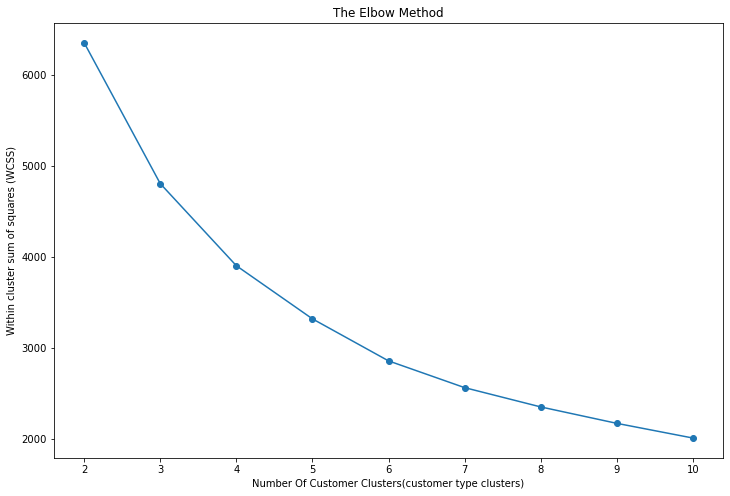

In [27]:
ks = range(2,11)
wcss = []
score = []

for i in ks: #From 2-11 doing multiple random initializations can make a huge difference to find a better local optima
    kmeans = KMeans(n_clusters = i, random_state=10) #init='k-means++', max_iter=300,n_init=10
    kmeans.fit(rfm_new)
    wcss.append(kmeans.inertia_)
    
    preds = kmeans.predict(rfm_new)
    score.append(silhouette_score(rfm_new, preds))

fig, ax = plt.subplots(figsize=(12, 8))
#plt.subplot(1, 2, 1)
plt.plot(ks , wcss, '-o')
plt.title('The Elbow Method')
plt.xlabel('Number Of Customer Clusters(customer type clusters)')
plt.ylabel('Within cluster sum of squares (WCSS)')
plt.xticks(ks)

print("for n_clusters = {}, silhouette score is {})".format(ks, score))
#plt.subplot(1, 2, 2)
#plt.plot(ks, score)
#plt.xlabel("$K$")
#plt.ylabel("Average Silhouette Score")

plt.show()

For n_clusters = 2 
The average silhouette_score is : 0.4313541541223895
For n_clusters = 3 
The average silhouette_score is : 0.3398549508694013
For n_clusters = 4 
The average silhouette_score is : 0.33655883627506616
For n_clusters = 5 
The average silhouette_score is : 0.30754080961481967
For n_clusters = 6 
The average silhouette_score is : 0.3109718813674158
For n_clusters = 7 
The average silhouette_score is : 0.3093214147555256
For n_clusters = 8 
The average silhouette_score is : 0.2790672167135041
For n_clusters = 9 
The average silhouette_score is : 0.28272499147500413
For n_clusters = 10 
The average silhouette_score is : 0.2793477553732211


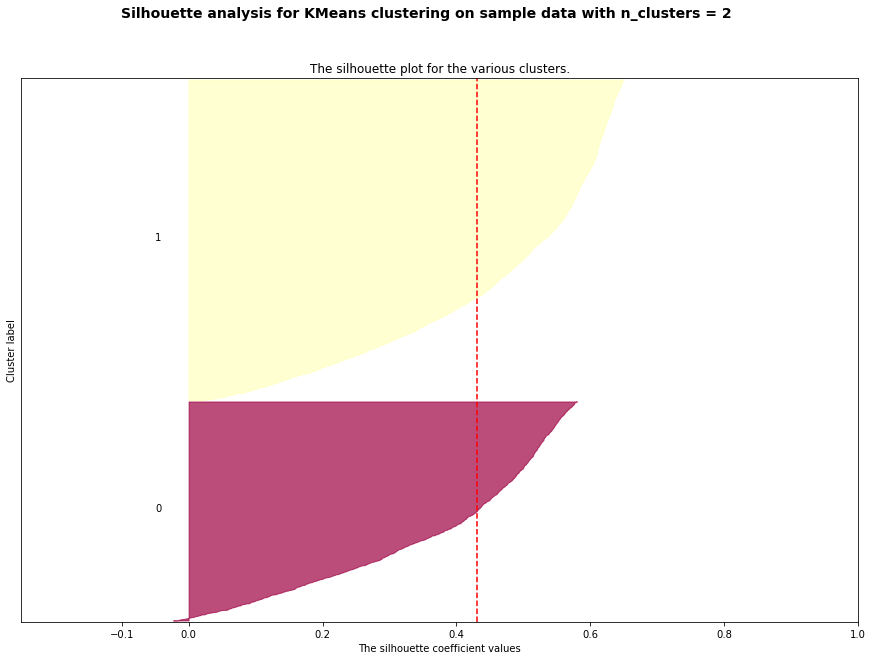

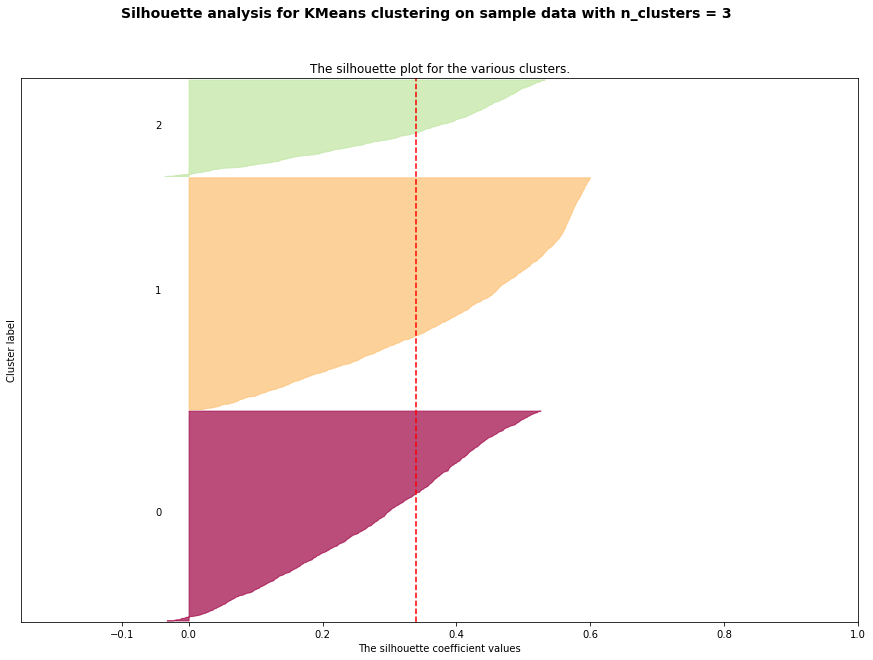

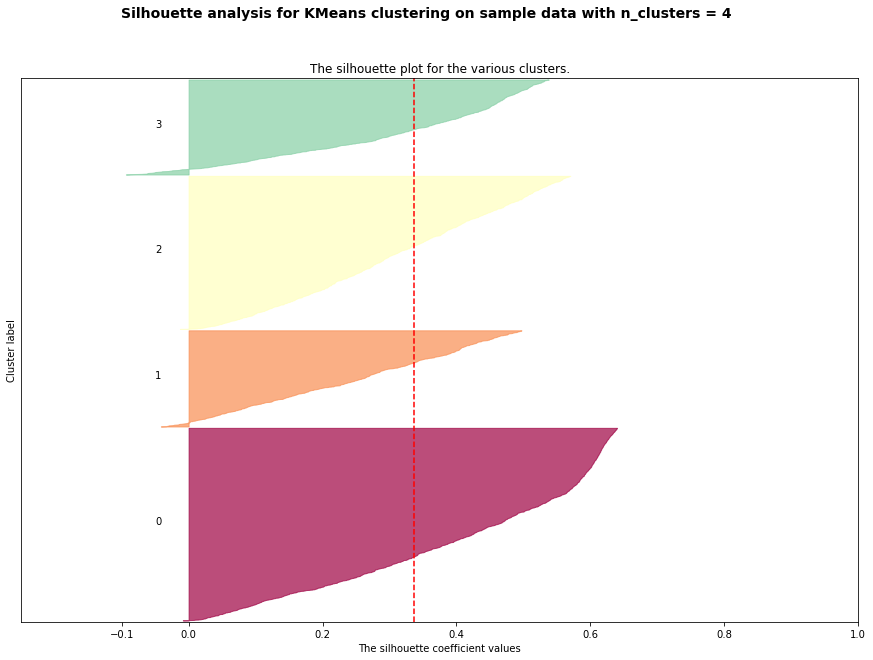

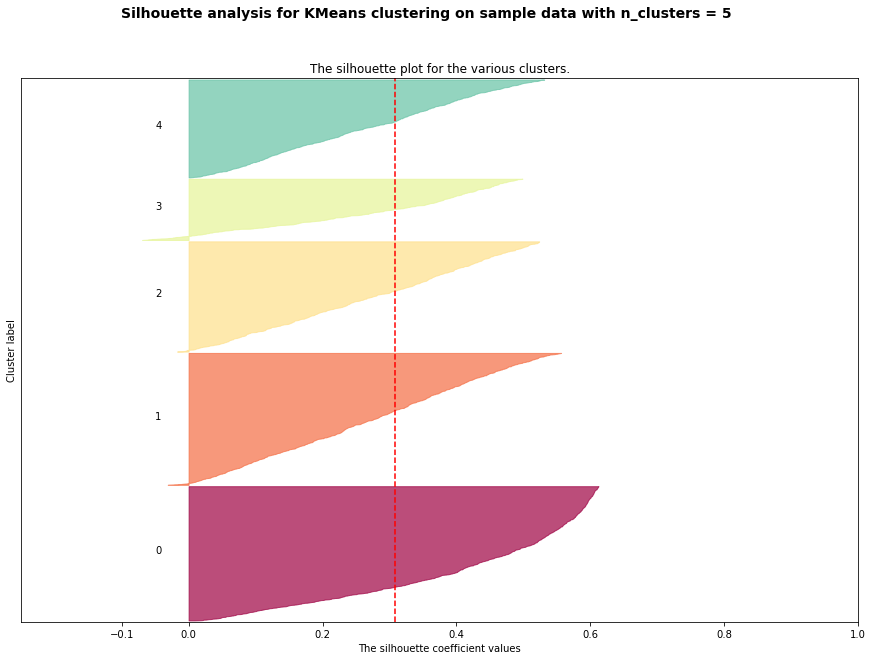

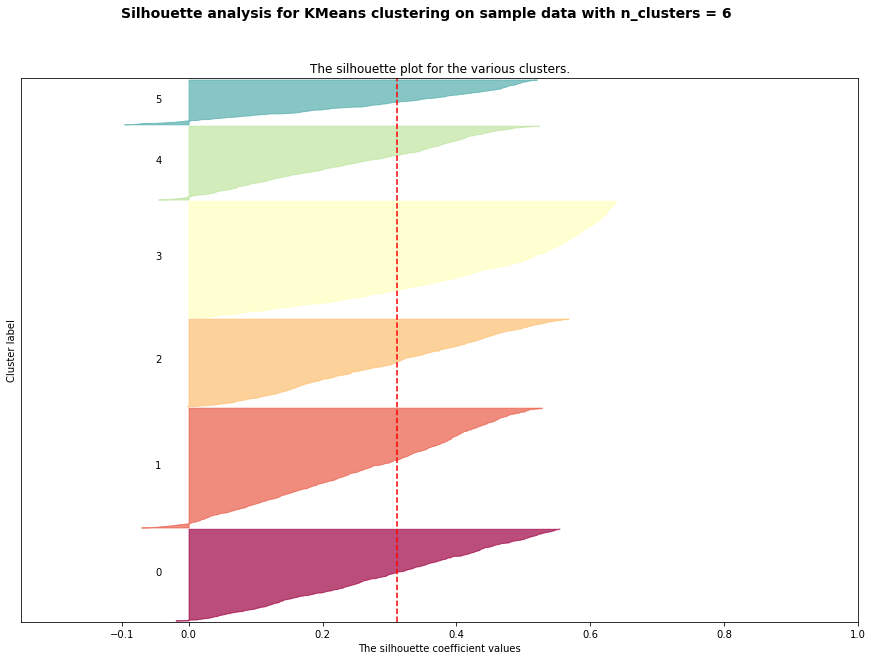

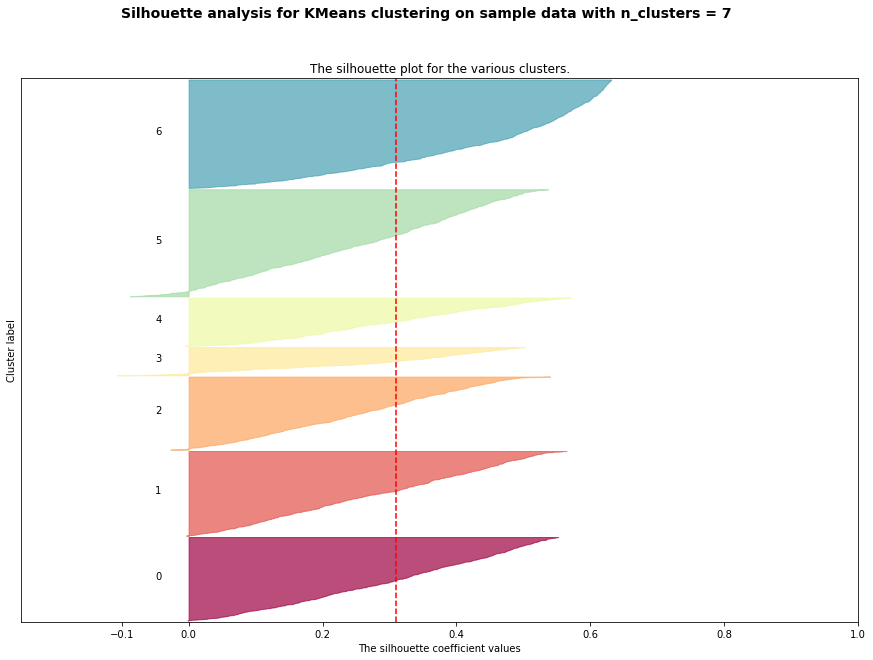

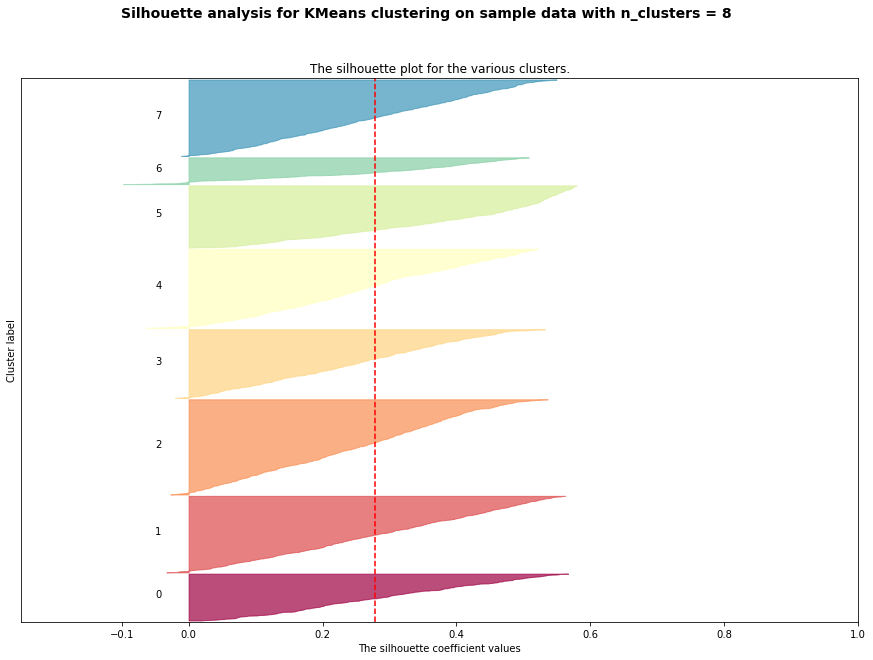

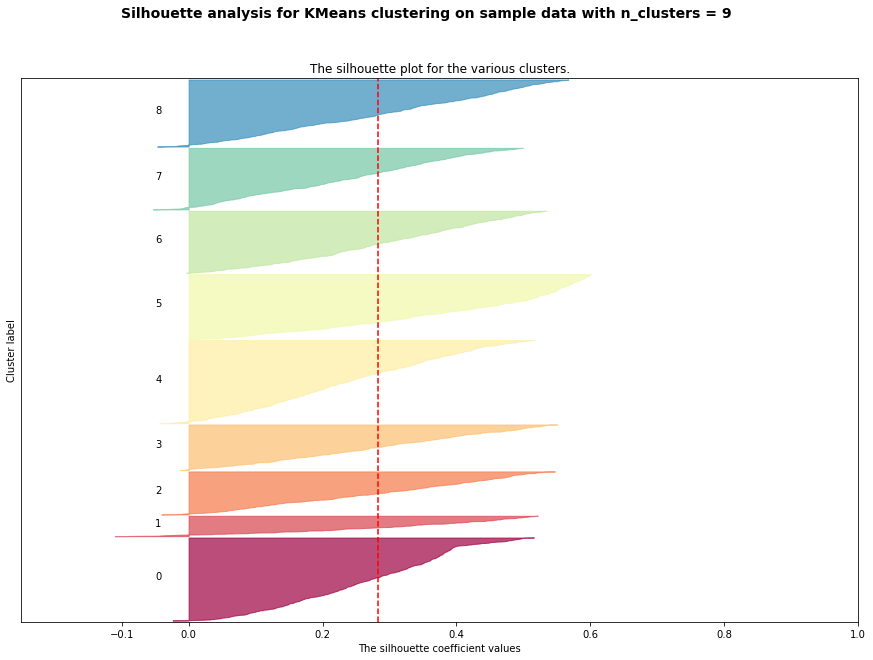

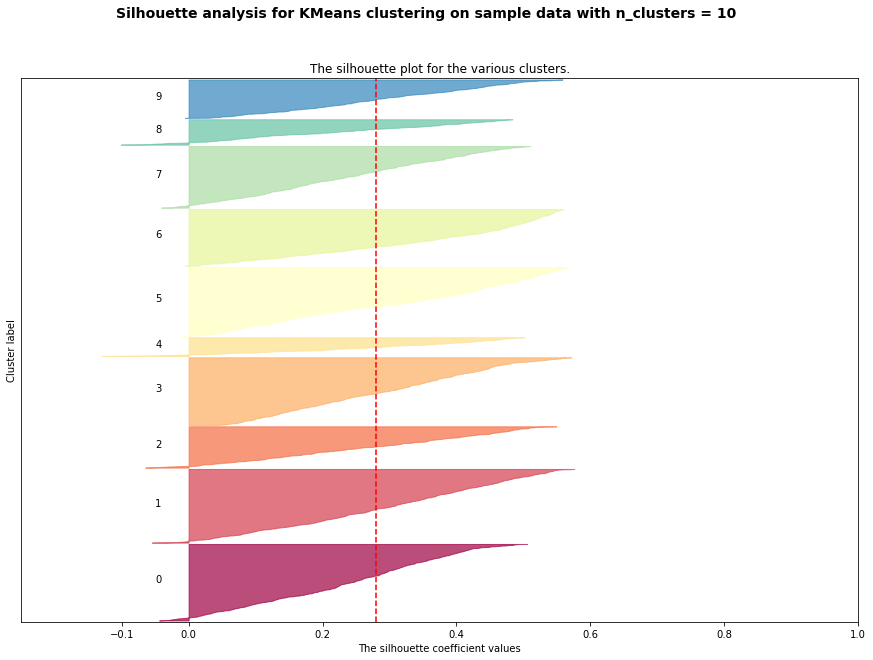

In [77]:
import sklearn.metrics
import matplotlib.cm as cm

# Make an empty list called avg_silhouette_scores
avg_silhouette_scores = []

# Iterate through Krange with variable K as before
for k in ks:
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(15, 10)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    # Call set_xlim on ax1 
    ax1.set_xlim([-0.25, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([-1, len(rfm_new) + (k + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusterer.fit_predict(rfm_new)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    # Make a variable called silhouette_avg. Set the parameters to silhouette_score to X, and cluster_labels
    silhouette_avg  = silhouette_score(rfm_new, cluster_labels)
    avg_silhouette_scores.append(silhouette_avg)
    print("For n_clusters = {} \nThe average silhouette_score is : {}".format(k, silhouette_avg))

    # Compute the silhouette scores for each sample
    # Call sklearn.metrics.silhouette_samples with the below parameters
    sample_silhouette_values = silhouette_samples(rfm_new, cluster_labels)

    y_lower = 10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        # Make a variable called ith_cluster_silhouette_values
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        # Call sort() on this variable 
        ith_cluster_silhouette_values.sort()
    
        # Call shape[0] on ith_cluster_silhouette_values 
        size_cluster_i = ith_cluster_silhouette_values.shape[0] 
        y_upper = y_lower + size_cluster_i

        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        # This requires calling text() on ax1 
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    # Setting title, xlabel and ylabel 
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    # This requires axvline() 
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % k),
                 fontsize=14, fontweight='bold')

In [60]:
#your turn
from sklearn.decomposition import PCA
import matplotlib.colors

def df_PCA(K):
    clusterer = KMeans(n_clusters=K, random_state=10)
    cluster_labels = clusterer.fit_predict(rfm_new)
    centroids = clusterer.cluster_centers_

    customers = rfm.reset_index()["CustomerID"]

    pca = PCA(n_components = 2)
    x, y = zip(*pca.fit_transform(rfm_new))

    df_pca = pd.DataFrame({"CustomerID": customers, "cluster_id": cluster_labels, "x": x, "y": y})
    return df_pca, x, y

df_pcaK4, x, y = df_PCA(K=4)
df_pcaK4.head()

,CustomerID,cluster_id,x,y
0,12347,3,2.558568,0.700904
1,12348,2,0.453395,-0.715322
2,12349,1,0.019604,0.528625
3,12350,0,-1.776516,-0.596164
4,12352,2,0.938920,-0.343744


In [61]:
clusterer = KMeans(n_clusters=4, random_state=10)
cluster_labels = clusterer.fit_predict(rfm_new)
centroids = clusterer.cluster_centers_

print(centroids)

[[ 0.88202062 -0.8665358  -0.81953796]
 [-0.81244427 -0.37705918 -0.43673269]
 [ 0.18736951  0.38077342  0.4650127 ]
 [-1.26307369  1.52299683  1.35286262]]


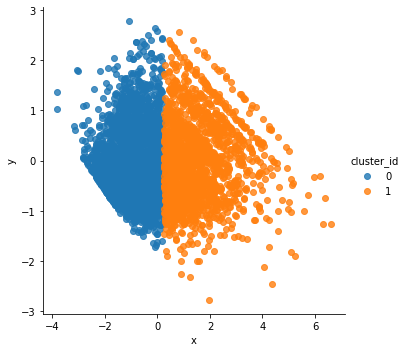

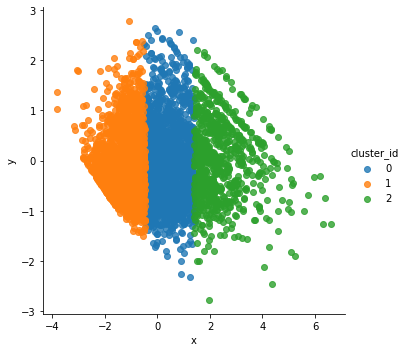

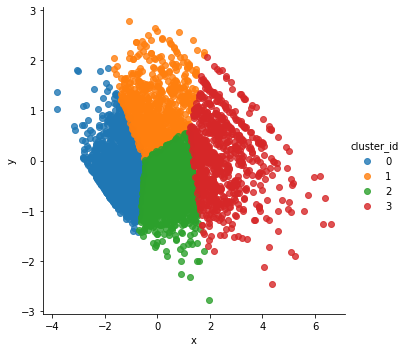

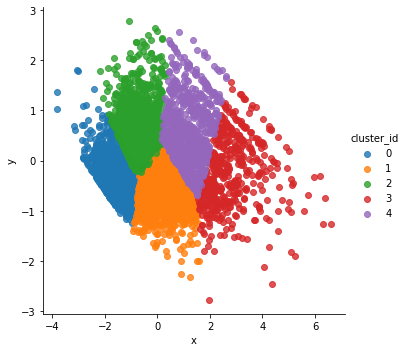

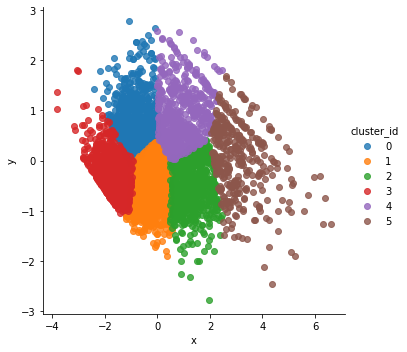

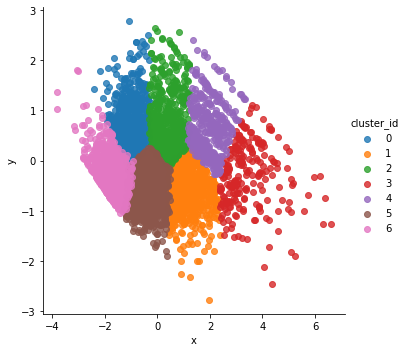

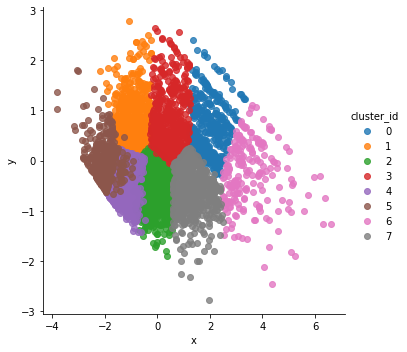

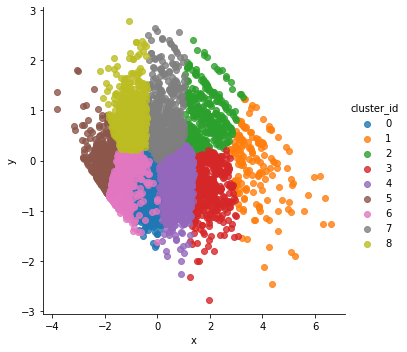

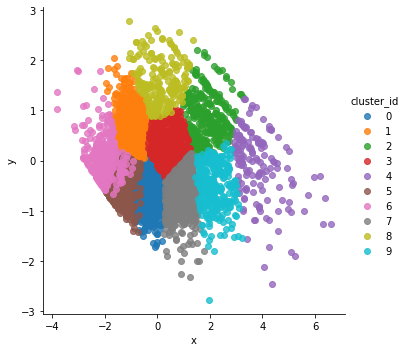

In [78]:
# plot a scatterplot of x and y:
ks= range(2, 11)
for K in ks:
    df_pca, x, y = df_PCA(K)
    sns.lmplot('x', 'y', data=df_pca, hue='cluster_id', fit_reg=False)

From above graphs, clustering of 4 looks better than others. Therefore k=4 is our choice.

Now let's look into details of the clusters.

In [40]:
df_merged_pca = pd.merge(rfm, df_pcaK4, on='CustomerID', how='right')
df_merged_pca.shape
df_merged_pca.head()

,CustomerID,recency,frequency,monetary_value,cluster_id,x,y
0,12347,3,7,4310.00,3,2.558568,0.700904
1,12348,76,4,1437.24,2,0.453395,-0.715322
2,12349,19,1,1457.55,1,0.019604,0.528625
3,12350,311,1,294.40,0,-1.776516,-0.596164
4,12352,37,6,1265.41,2,0.938920,-0.343744


In [41]:
df_cluster1=df_merged_pca.loc[(df_merged_pca["cluster_id"]==0)]
df_cluster2=df_merged_pca.loc[(df_merged_pca["cluster_id"]==1)]
df_cluster3=df_merged_pca.loc[(df_merged_pca["cluster_id"]==2)]
df_cluster4=df_merged_pca.loc[(df_merged_pca["cluster_id"]==3)]
#df_cluster5=df_merged_pca.loc[(df_merged_pca["cluster_id"]==4)]

In [42]:
df_merged_pca['cluster_id'].value_counts()

0    1551
2    1233
1     775
3     765
Name: cluster_id, dtype: int64

In [69]:
df_merged_pca_log = pd.merge(rfm_log, df_pcaK4, on='CustomerID', how='right')
df_merged_pca_log.shape
df_merged_pca_log.head()

,CustomerID,recency,frequency,monetary_value,cluster_id,x,y
0,12347,1.098612,1.945910,8.368693,3,2.558568,0.700904
1,12348,4.330733,1.386294,7.270480,2,0.453395,-0.715322
2,12349,2.944439,0.000000,7.284512,1,0.019604,0.528625
3,12350,5.739793,0.000000,5.684939,0,-1.776516,-0.596164
4,12352,3.610918,1.791759,7.143151,2,0.938920,-0.343744


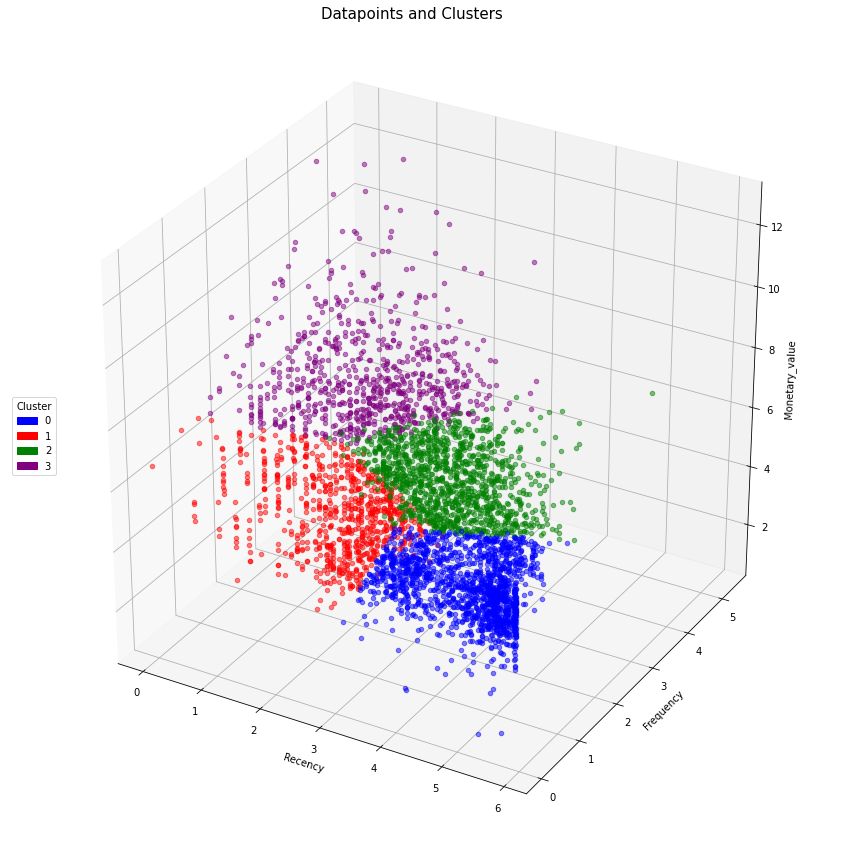

In [70]:
#plotting all datapoints with respect to their cluster
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
#datapoints
xd = list(df_merged_pca_log['recency'])
yd = list(df_merged_pca_log['frequency'])
zd = list(df_merged_pca_log['monetary_value'])
data_points = [(x,y,z) for x,y,z in zip(xd,yd,zd)]
#specifying point sizes for the number of repeats
#sizes = list(Clustered['Repeats'])
#colors for clusters
colorlist = ['blue','red','green', 'purple']
colors = list(map(lambda x: colorlist[x], df_merged_pca['cluster_id']))
#markers for country names
#markers = ['o' if con == 'UK' else ',' for con in list(Clustered['UK?'])]
#creating the scatterplot
for data, color in zip(data_points, colors): #sizes, , markers
    x,y,z = data
    ax.scatter(x,y,z, alpha=0.5, c=color) #, s=size, marker=mark
ax.set(xlabel='Recency', ylabel='Frequency', zlabel='Monetary_value')
#plot legend for cluster colors
legend_items = {'0':'blue', '1':'red', '2':'green', '3':'purple'}
itemlist = []
for itemkey in legend_items:
    patch = mpatches.Patch(color=legend_items[itemkey], label=itemkey)
    itemlist.append(patch)
plt.legend(handles=itemlist, title='Cluster', fancybox=True, loc=6)
plt.suptitle('Datapoints and Clusters', fontsize = 15, y = 0.90)
plt.show()

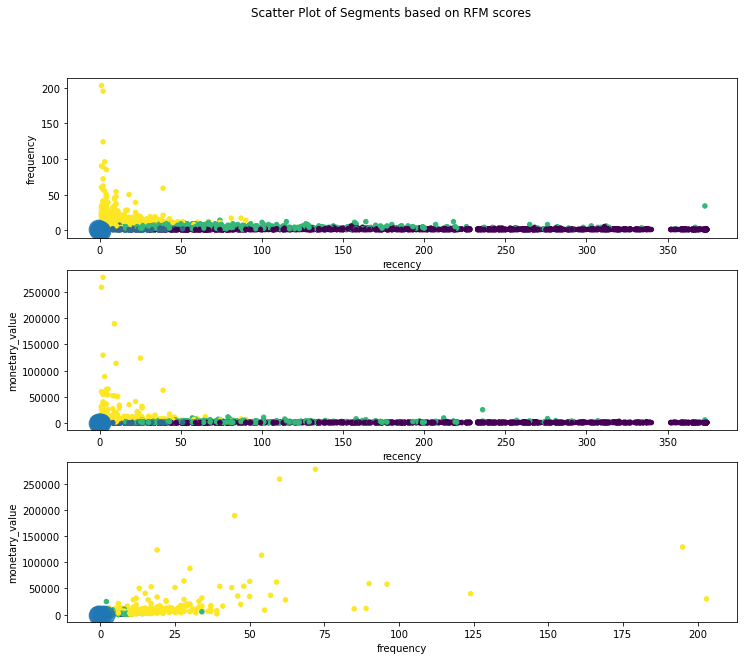

In [66]:
# Scatter plot of data coloured by cluster they belong to
fig, (ax4, ax5, ax6) = plt.subplots(3);
fig.suptitle('Scatter Plot of Segments based on RFM scores');

df_merged_pca.plot.scatter(x = 'recency', y = 'frequency', c=df_merged_pca['cluster_id'], colormap='viridis', ax=ax4, colorbar=False,figsize = (12,10));
ax4.scatter(centroids[:,0], centroids[:,1], marker='o', s=350, alpha=.8, cmap='viridis'); #c=range(0,k), 

df_merged_pca.plot.scatter(x = 'recency', y = 'monetary_value', c=df_merged_pca['cluster_id'], colormap='viridis', ax=ax5, colorbar=False);
ax5.scatter(centroids[:,0], centroids[:,2], marker='o', s=350, alpha=.8,  cmap='viridis'); #c=range(0,k),

df_merged_pca.plot.scatter(x = 'frequency', y = 'monetary_value', c=df_merged_pca['cluster_id'], colormap='viridis', ax=ax6, colorbar=False);
ax6.scatter(centroids[:,1], centroids[:,2], marker='o', s=350, alpha=.8, cmap='viridis'); #c=range(0,k), 

In [43]:
df_cluster1.describe()

,recency,frequency,monetary_value,cluster_id,x,y
count,1551.000000,1551.000000,1551.000000,1551.0,1551.000000,1551.000000
mean,184.682785,1.245648,327.691264,0.0,-1.475121,-0.147118
std,101.876978,0.515194,257.633670,0.0,0.516520,0.515856
min,23.000000,1.000000,2.900000,0.0,-3.833170,-1.424748
25%,82.000000,1.000000,155.915000,0.0,-1.846390,-0.526934
50%,180.000000,1.000000,275.880000,0.0,-1.465871,-0.222961
75%,267.000000,1.000000,406.505000,0.0,-1.057339,0.191881
max,374.000000,6.000000,2661.240000,0.0,-0.484585,1.842118


In [44]:
df_cluster2.describe()

,recency,frequency,monetary_value,cluster_id,x,y
count,775.000000,775.000000,775.000000,775.0,775.000000,775.000000
mean,18.975484,2.033548,502.501419,1.0,-0.080312,0.990226
std,11.927891,0.989041,348.411475,0.0,0.697824,0.530825
min,1.000000,1.000000,35.400000,1.0,-1.658690,0.049135
25%,9.500000,1.000000,267.405000,1.0,-0.650076,0.576325
50%,18.000000,2.000000,429.840000,1.0,-0.107727,0.893686
75%,26.000000,3.000000,656.660000,1.0,0.449419,1.303061
max,57.000000,7.000000,3861.000000,1.0,1.775173,2.790840


In [45]:
df_cluster3.describe()

,recency,frequency,monetary_value,cluster_id,x,y
count,1233.000000,1233.000000,1233.000000,1233.0,1233.000000,1233.000000
mean,75.738848,3.969992,1539.872968,2.0,0.419148,-0.469974
std,60.252148,1.966416,1294.441209,0.0,0.579703,0.490793
min,9.000000,1.000000,226.750000,2.0,-0.691333,-2.781616
25%,33.000000,3.000000,813.110000,2.0,-0.084976,-0.822441
50%,59.000000,4.000000,1207.240000,2.0,0.443464,-0.442494
75%,96.000000,5.000000,1842.140000,2.0,0.904693,-0.090480
max,373.000000,34.000000,24850.900000,2.0,1.949086,0.559229


In [46]:
df_cluster4.describe()

,recency,frequency,monetary_value,cluster_id,x,y
count,765.000000,765.000000,765.000000,765.0,765.000000,765.000000
mean,11.913725,12.905882,7192.854314,3.0,2.396531,0.052593
std,11.627301,14.758759,18769.289397,0.0,0.884407,0.737432
min,1.000000,3.000000,739.720000,3.0,1.219815,-2.468972
25%,4.000000,6.000000,2075.340000,3.0,1.752977,-0.483894
50%,9.000000,9.000000,3408.200000,3.0,2.169866,0.047454
75%,17.000000,14.000000,5815.190000,3.0,2.794425,0.566146
max,90.000000,203.000000,278742.020000,3.0,6.615487,2.071835


In [ ]:
#df_cluster5.describe()

In [47]:
counts = [len(df_cluster1), len(df_cluster2), len(df_cluster3), len(df_cluster4)]

recency_min = [df_cluster1.recency.min(), df_cluster2.recency.min(), df_cluster3.recency.min(), df_cluster4.recency.min()]
recency_mean = [df_cluster1.recency.mean(), df_cluster2.recency.mean(), df_cluster3.recency.mean(), df_cluster4.recency.mean()]
recency_max = [df_cluster1.recency.max(), df_cluster2.recency.max(), df_cluster3.recency.max(), df_cluster4.recency.max()]

frequency_min = [df_cluster1.frequency.min(), df_cluster2.frequency.min(), df_cluster3.frequency.min(), df_cluster4.frequency.min()]
frequency_mean = [df_cluster1.frequency.mean(), df_cluster2.frequency.mean(), df_cluster3.frequency.mean(), df_cluster4.frequency.mean()]
frequency_max = [df_cluster1.frequency.max(), df_cluster2.frequency.max(), df_cluster3.frequency.max(), df_cluster4.frequency.max()]

monetary_value_min = [df_cluster1.monetary_value.min(), df_cluster2.monetary_value.min(), df_cluster3.monetary_value.min(), df_cluster4.monetary_value.min()]
monetary_value_mean = [df_cluster1.monetary_value.mean(), df_cluster2.monetary_value.mean(), df_cluster3.monetary_value.mean(), df_cluster4.monetary_value.mean()]
monetary_value_max = [df_cluster1.monetary_value.max(), df_cluster2.monetary_value.max(), df_cluster3.monetary_value.max(), df_cluster4.monetary_value.max()]
monetary_value_total = [df_cluster1.monetary_value.sum(), df_cluster2.monetary_value.sum(), df_cluster3.monetary_value.sum(), df_cluster4.monetary_value.sum()]

In [48]:
d ={'clusters': ['cluster1', 'cluster2', 'cluster3', 'cluster4'], \
   'counts': counts, 'recency_min': recency_min, 'recency_mean': recency_mean, 'recency_max': recency_max, \
   'frequency_min': frequency_min, 'frequency_mean': frequency_mean, 'frequency_max': frequency_max, \
   'monetary_value_min': monetary_value_min, 'monetary_value_mean': monetary_value_mean, \
   'monetary_value_max': monetary_value_max, 'monetary_value_total': monetary_value_total, \
   }
clusters = pd.DataFrame(data=d)
clusters

,clusters,counts,recency_min,recency_mean,recency_max,frequency_min,frequency_mean,frequency_max,monetary_value_min,monetary_value_mean,monetary_value_max,monetary_value_total
0,cluster1,1551,23,184.682785,374,1,1.245648,6,2.90,327.691264,2661.24,508249.15
1,cluster2,775,1,18.975484,57,1,2.033548,7,35.40,502.501419,3861.00,389438.60
2,cluster3,1233,9,75.738848,373,1,3.969992,34,226.75,1539.872968,24850.90,1898663.37
3,cluster4,765,1,11.913725,90,3,12.905882,203,739.72,7192.854314,278742.02,5502533.55


In [49]:
clusters.reset_index()
clusters

,clusters,counts,recency_min,recency_mean,recency_max,frequency_min,frequency_mean,frequency_max,monetary_value_min,monetary_value_mean,monetary_value_max,monetary_value_total
0,cluster1,1551,23,184.682785,374,1,1.245648,6,2.90,327.691264,2661.24,508249.15
1,cluster2,775,1,18.975484,57,1,2.033548,7,35.40,502.501419,3861.00,389438.60
2,cluster3,1233,9,75.738848,373,1,3.969992,34,226.75,1539.872968,24850.90,1898663.37
3,cluster4,765,1,11.913725,90,3,12.905882,203,739.72,7192.854314,278742.02,5502533.55


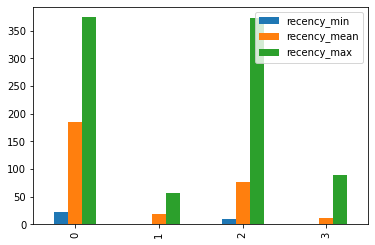

In [50]:
clusters[['recency_min', 'recency_mean', 'recency_max']].plot(kind='bar')
plt.show()

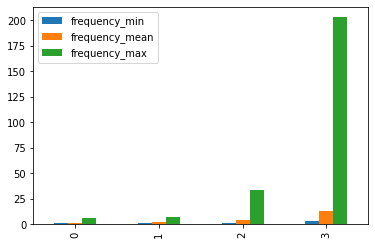

In [51]:
clusters[['frequency_min', 'frequency_mean', 'frequency_max']].plot(kind='bar')
plt.show()

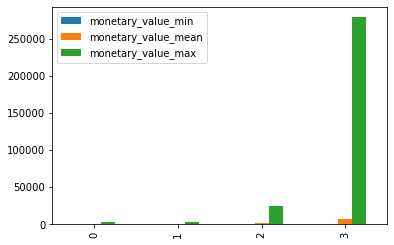

In [52]:
clusters[['monetary_value_min', 'monetary_value_mean', 'monetary_value_max']].plot(kind='bar')
plt.show()